In [0]:
#Importing the libraries which will be used in analysis

import pandas as pd
import numpy as np
import re
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Reading and displaying applictaion data of the applicant

os.chdir("F:\\UpGrad\Statistics & EDA\\Case Study")
cred = pd.read_csv("application_data.csv")
cred

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Understanding the data and datatypes of the application dataset in various columns

print(cred.describe)
print(cred.shape)
print(cred.info())

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12  

In [0]:
#Identifying if there is any singificant amount of null values

cred.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [0]:
# There is around 10 columns with high null values so dropping these columns 
# since most of them seems to be irrelevent for the analysis

cred_01=round((100*cred.isnull().sum()/len(cred.index)),2)
for index in cred_01.index:
    if cred_01[index] >= 50.00:        
        cred=cred.drop([index], axis = 'columns')
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [0]:
#Detecting Outiers and imbalance in data

cred_filter = cred[["SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "FLAG_MOBIL"]]
cred_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 non

In [0]:
cred_filter

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,1
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,1
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,1
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,1
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,1
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,1
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,1
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,1


In [0]:
cred_filter[["NAME_TYPE_SUITE", "NAME_HOUSING_TYPE"]]

,NAME_TYPE_SUITE,NAME_HOUSING_TYPE
0,Unaccompanied,House / apartment
1,Family,House / apartment
2,Unaccompanied,House / apartment
3,Unaccompanied,House / apartment
4,Unaccompanied,House / apartment
5,"Spouse, partner",House / apartment
6,Unaccompanied,House / apartment
7,Unaccompanied,House / apartment
8,Children,House / apartment
9,Unaccompanied,House / apartment


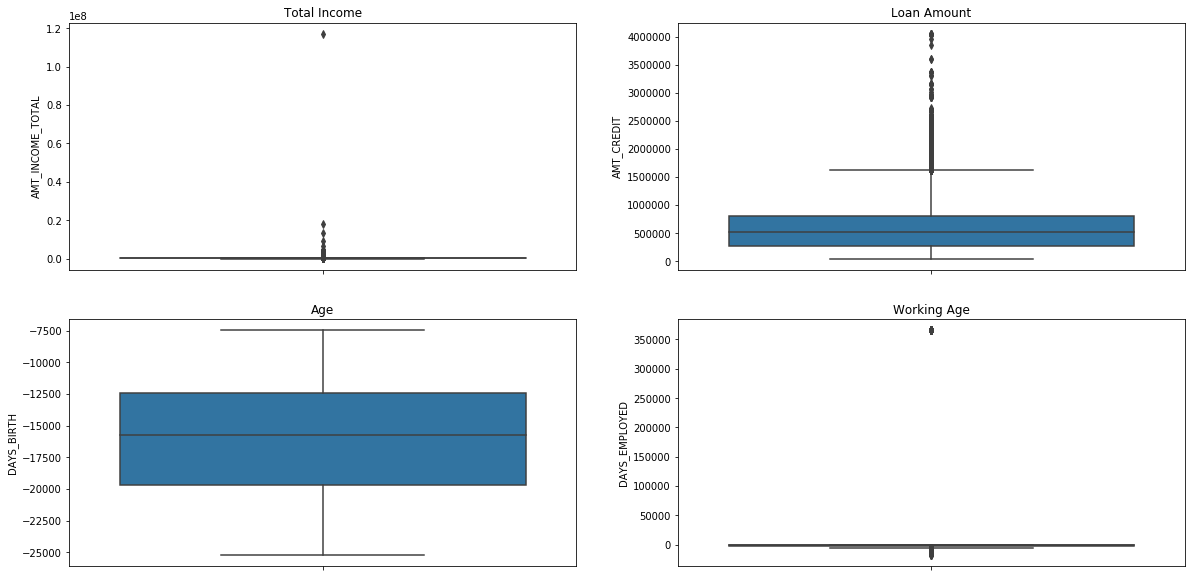

In [0]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title("Total Income")
sns.boxplot(y=cred_filter["AMT_INCOME_TOTAL"])

plt.subplot(2, 2, 2)
plt.title("Loan Amount")
sns.boxplot(y=cred_filter["AMT_CREDIT"])

plt.subplot(2, 2, 3)
plt.title("Age")
sns.boxplot(y=cred_filter["DAYS_BIRTH"])

plt.subplot(2, 2, 4)
plt.title("Working Age")
sns.boxplot(y=cred_filter["DAYS_EMPLOYED"])

plt.show()

In [0]:
imbalance = len(cred_filter.loc[cred_filter["TARGET"] == 1]) / len(cred_filter.loc[cred_filter["TARGET"] == 0])
print("Imbalance Ratio is: "+ str(round(imbalance, 2)))
print("Imbalance percentage: "+ str(round(imbalance * 100, 2)) + "%")

Imbalance Ratio is: 0.09
Imbalance percentage: 8.78%


The imbalace ratio and imbalance percentengae is 0.09 and 8.78% respectively

In [0]:
cred_0 = cred_filter.loc[cred_filter['TARGET'] == 0]
cred_1 = cred_filter.loc[cred_filter['TARGET'] == 1]

In [0]:
cred_0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,1
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,1
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,1
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,1
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,1
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,1
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,1
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,1


In [0]:
cred_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,1
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,1
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,1
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,1
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802.0,1
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,Unaccompanied,Commercial associate,Incomplete higher,Separated,House / apartment,0.007274,-10526,-267,-387.0,1
138,100160,1,Cash loans,M,N,Y,0,292500.0,675000.0,36747.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-16667,-200,-5239.0,1
154,100181,1,Cash loans,F,N,Y,0,157500.0,245619.0,12667.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.022625,-17538,-7676,-774.0,1
163,100192,1,Cash loans,F,N,N,0,111915.0,225000.0,21037.5,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,With parents,0.018801,-7989,-150,-2570.0,1


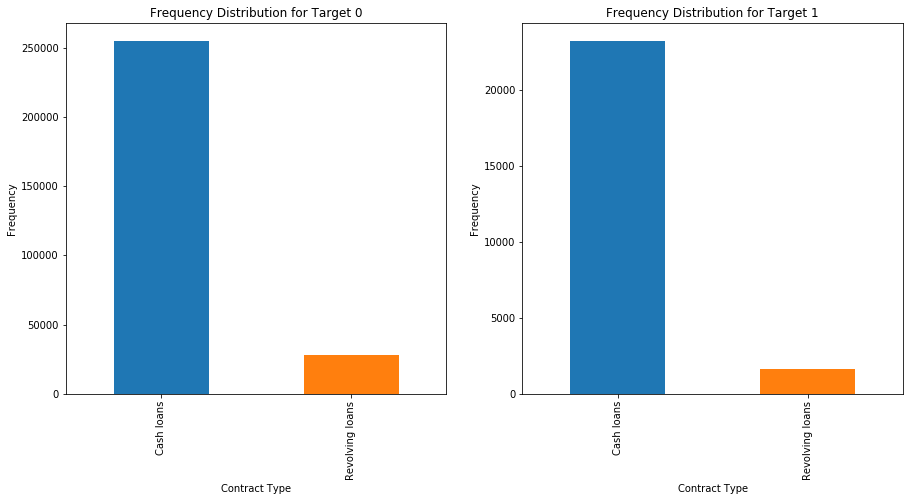

In [0]:
#plotting frequency distriboution for Target variables 0 and 1 for cash and revolving loans

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.title("Frequency Distribution for Target 0")
plt.xlabel("Contract Type")
plt.ylabel("Frequency")
cred_0["NAME_CONTRACT_TYPE"].value_counts().plot(kind='bar')

plt.subplot(2, 2, 2)
plt.title("Frequency Distribution for Target 1")
plt.xlabel("Contract Type")
plt.ylabel("Frequency")
cred_1["NAME_CONTRACT_TYPE"].value_counts().plot(kind='bar')

plt.show()

In [0]:
# In the above two plot it is clear that people are not repaying cash loans on time.

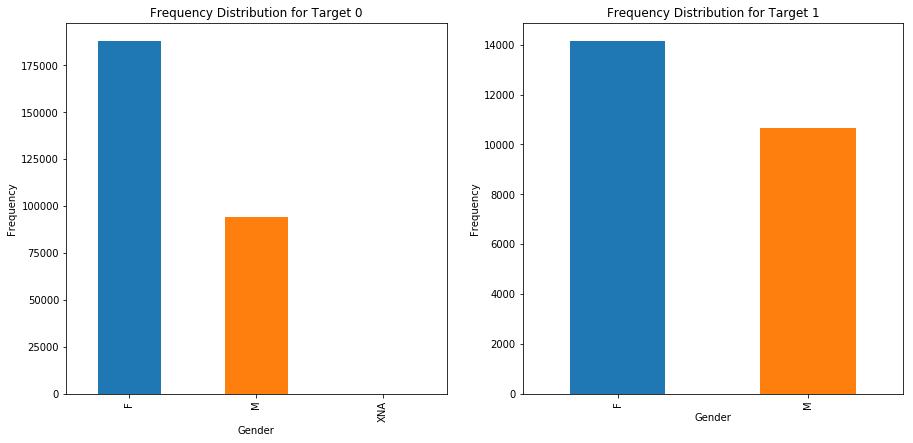

In [0]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.title("Frequency Distribution for Target 0")
plt.xlabel("Gender")
plt.ylabel("Frequency")
cred_0["CODE_GENDER"].value_counts().plot(kind='bar')

plt.subplot(2, 2, 2)
plt.title("Frequency Distribution for Target 1")
plt.xlabel("Gender")
plt.ylabel("Frequency")
cred_1["CODE_GENDER"].value_counts().plot(kind='bar')

plt.show()

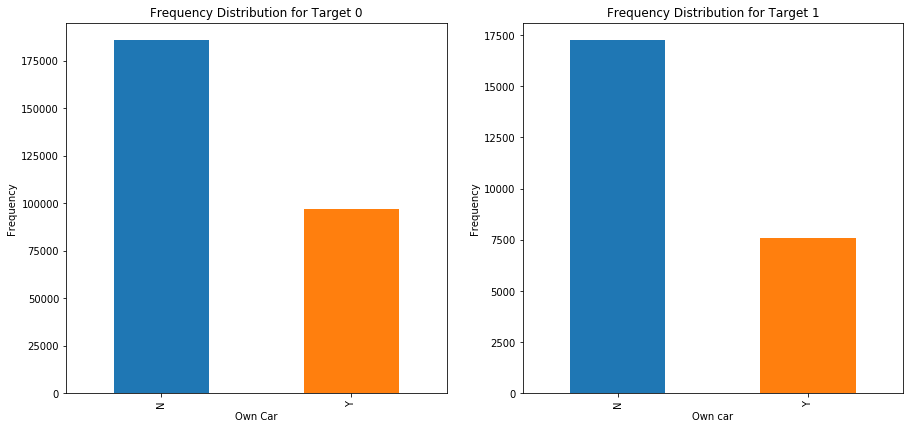

In [0]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.title("Frequency Distribution for Target 0")
plt.xlabel("Own Car")
plt.ylabel("Frequency")
cred_0["FLAG_OWN_CAR"].value_counts().plot(kind='bar')

plt.subplot(2, 2, 2)
plt.title("Frequency Distribution for Target 1")
plt.xlabel("Own car")
plt.ylabel("Frequency")
cred_1["FLAG_OWN_CAR"].value_counts().plot(kind='bar')

plt.show()

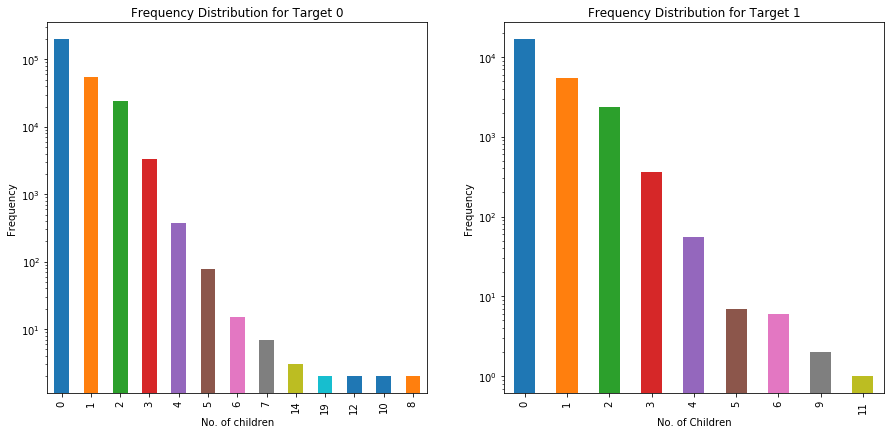

In [0]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.title("Frequency Distribution for Target 0")
plt.xlabel("No. of Children")
plt.ylabel("Frequency")
#plt.yscale("log")
cred_0["CNT_CHILDREN"].value_counts().plot(kind='bar')

plt.subplot(2, 2, 2)
plt.title("Frequency Distribution for Target 1")
plt.xlabel("No. of Children")
plt.ylabel("Frequency")
#plt.yscale("log")
cred_1["CNT_CHILDREN"].value_counts().sort_values(ascending = False).plot(kind='bar')

plt.show()

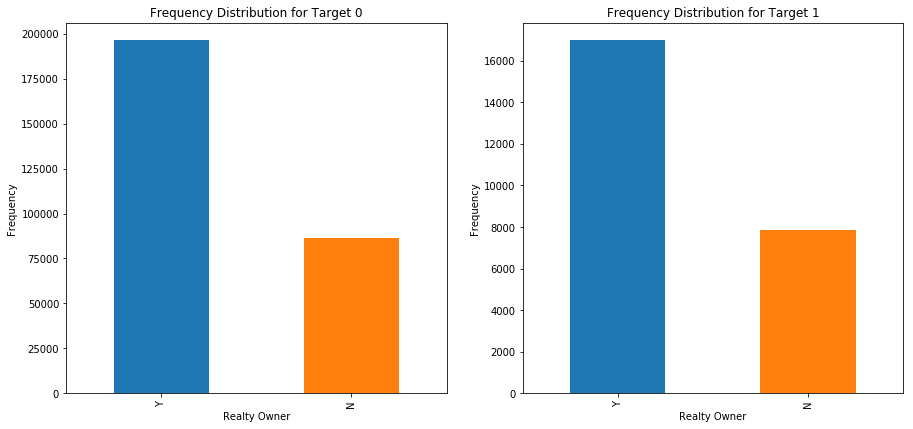

In [0]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.title("Frequency Distribution for Target 0")
plt.xlabel("Realty Owner")
plt.ylabel("Frequency")
cred_0["FLAG_OWN_REALTY"].value_counts().plot(kind='bar')

plt.subplot(2, 2, 2)
plt.title("Frequency Distribution for Target 1")
plt.xlabel("Realty Owner")
plt.ylabel("Frequency")
cred_1["FLAG_OWN_REALTY"].value_counts().plot(kind='bar')

plt.show()

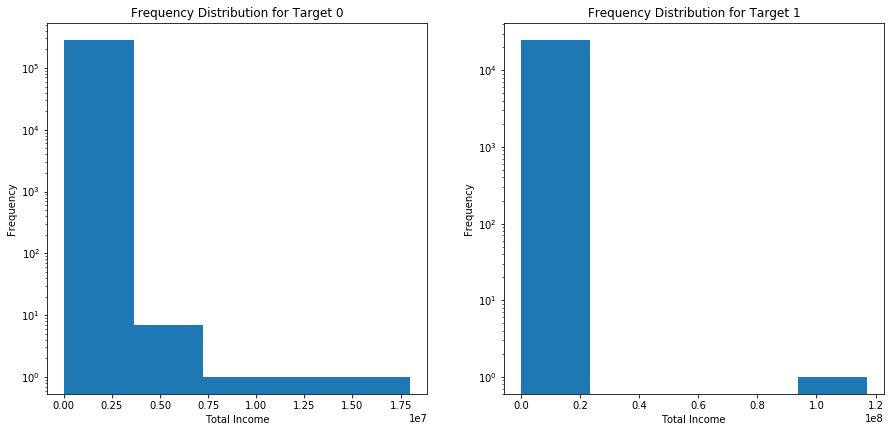

In [0]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.title("Frequency Distribution for Target 0")
plt.xlabel("Total Income")
plt.ylabel("Frequency")
plt.yscale("log")
plt.hist(cred_0["AMT_INCOME_TOTAL"], bins = 5)

plt.subplot(2, 2, 2)
plt.title("Frequency Distribution for Target 1")
plt.xlabel("Total Income")
plt.ylabel("Frequency")
plt.yscale("log")
plt.hist(cred_1["AMT_INCOME_TOTAL"], bins = 5)

plt.show()

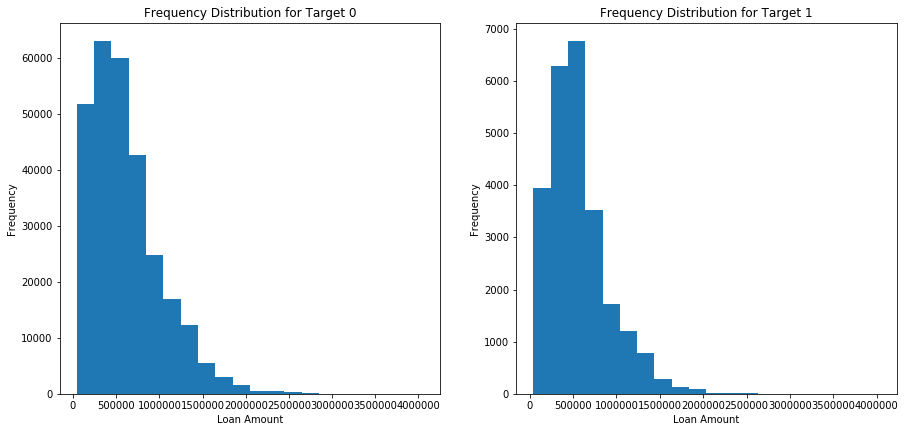

In [0]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.title("Frequency Distribution for Target 0")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
#plt.yscale("log")
plt.hist(cred_0["AMT_CREDIT"], bins = 20)

plt.subplot(2, 2, 2)
plt.title("Frequency Distribution for Target 1")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
#plt.yscale("log")
plt.hist(cred_1["AMT_CREDIT"], bins = 20)

plt.show()

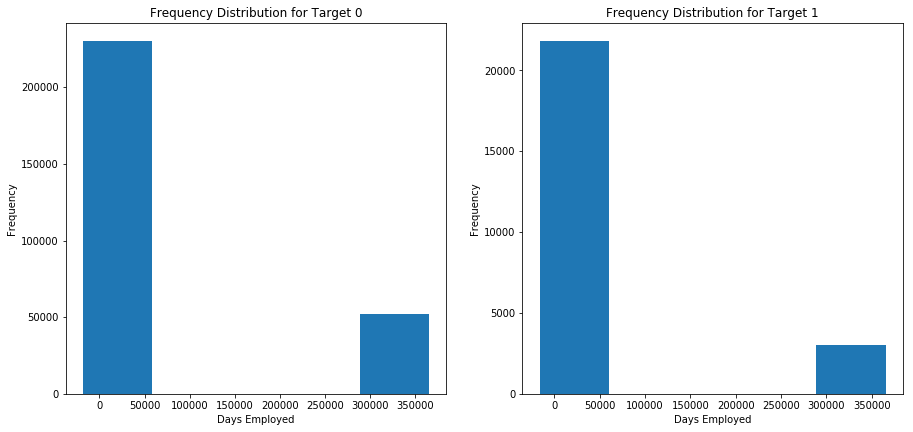

In [0]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.title("Frequency Distribution for Target 0")
plt.xlabel("Days Employed")
plt.ylabel("Frequency")
#plt.yscale('log')
plt.hist(cred_0["DAYS_EMPLOYED"], bins = 5)

plt.subplot(2, 2, 2)
plt.title("Frequency Distribution for Target 1")
plt.xlabel("Days Employed")
plt.ylabel("Frequency")
#plt.yscale('log')
plt.hist(cred_1["DAYS_EMPLOYED"], bins = 5)

plt.show()

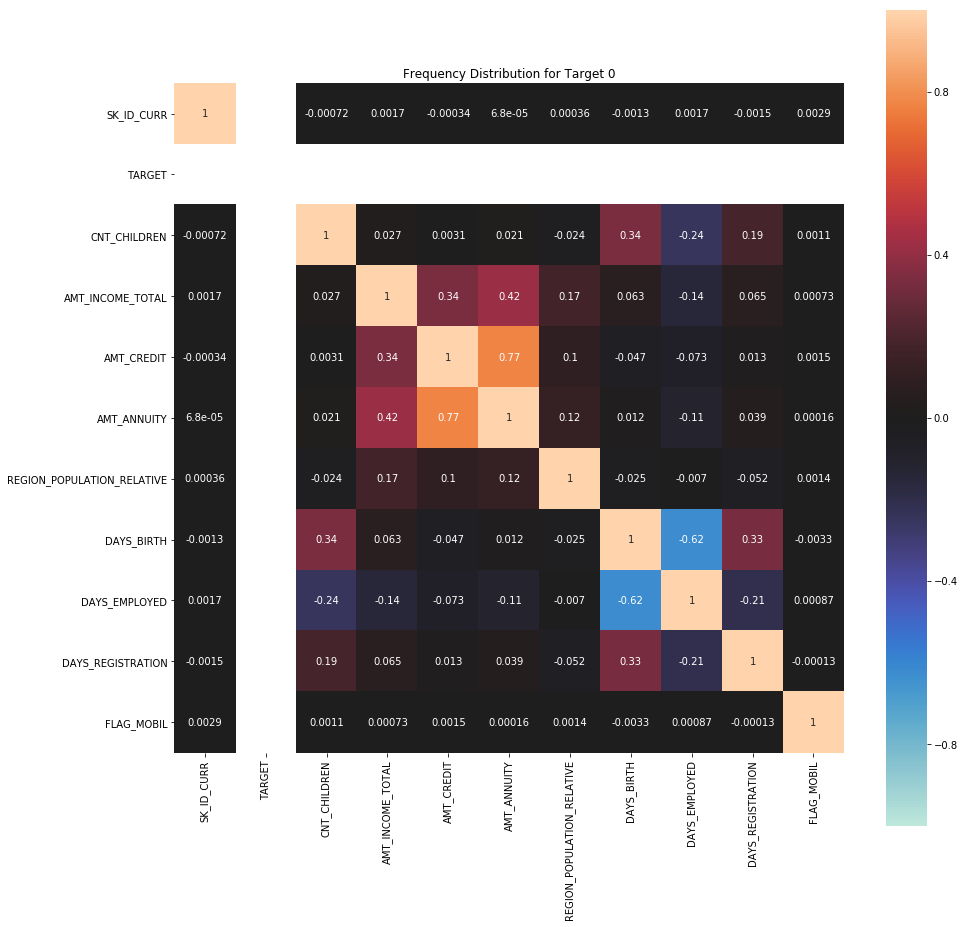

In [0]:
#Top 10 correlation between clients with payment difficulties for target 0

plt.figure(figsize=(15, 15))
plt.title("Frequency Distribution for Target 0")
corr = cred_0.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, annot = True, square = True)

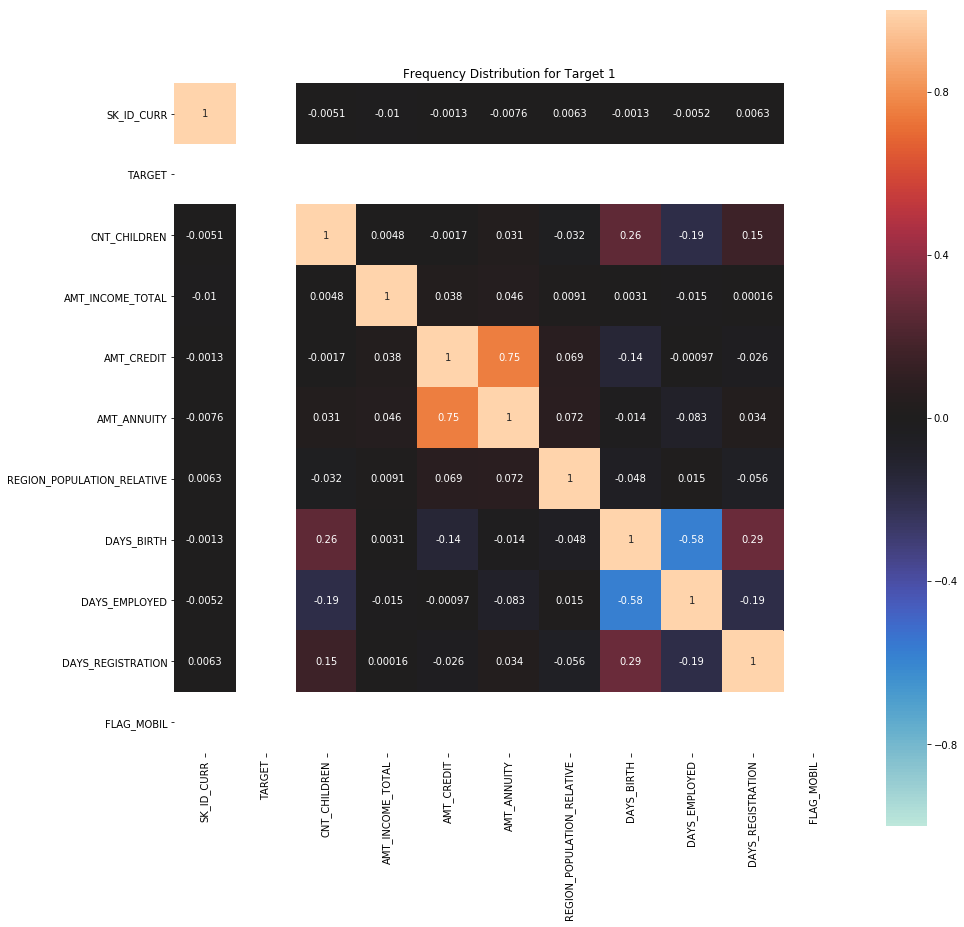

In [0]:
#Top 10 correlation between clients with payment difficulties for target 1

plt.figure(figsize=(15, 15))
plt.title("Frequency Distribution for Target 1")
corr = cred_1.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, annot = True, square = True)

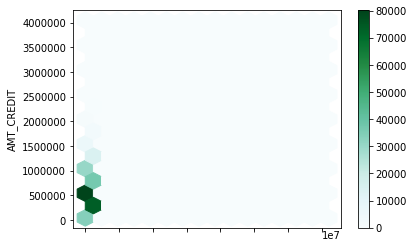

In [0]:
#Analysis for the relation between Total income and Loan Credit for both target1 and target 0.

cred_0.plot.hexbin(x = "AMT_INCOME_TOTAL", y = "AMT_CREDIT", gridsize=15)
plt.show()

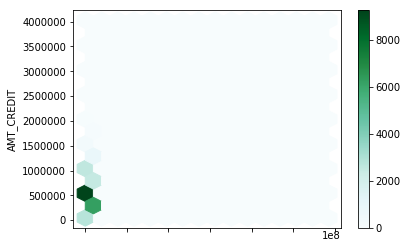

In [0]:
cred_1.plot.hexbin(x = "AMT_INCOME_TOTAL", y = "AMT_CREDIT", gridsize=15)
plt.show()